In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
# Set dataset path here
DATASET_DIR = "/content/drive/MyDrive/fire/fire_dataset"
# Parameters
IMG_SIZE = (224, 224)  # VGG16 input size
BATCH_SIZE = 32
EPOCHS = 10  # Increase if needed

In [3]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    rotation_range=10,
    shear_range=0.1
)

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)


Found 800 images belonging to 2 classes.
Found 199 images belonging to 2 classes.


In [4]:
base_model = VGG16(include_top=False, input_shape=(224, 224, 3), weights='imagenet')

# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [6]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [7]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 270s 10s/step - accuracy: 0.8033 - loss: 2.3952 - val_accuracy: 0.9397 - val_loss: 0.5374
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9602 - loss: 0.2541 - val_accuracy: 0.9598 - val_loss: 0.3485
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9685 - loss: 0.2415 - val_accuracy: 0.9698 - val_loss: 0.2865
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9820 - loss: 0.1161 - val_accuracy: 0.9648 - val_loss: 0.3138
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9792 - loss: 0.0959 - val_accuracy: 0.9648 - val_loss: 0.3367
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9782 - loss: 0.1229 - val_accuracy: 0.9648 - val_loss: 0.4656
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9931 - loss: 0.0156 - val_accuracy: 0.9548 - val_loss: 0.2981
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9880 - loss: 0.0434 - val_accuracy: 0.9698 - val_los

In [8]:
val_generator.reset()
preds = model.predict(val_generator, verbose=1)
y_pred = (preds > 0.5).astype(int)
y_true = val_generator.classes

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["No Fire", "Fire"]))


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 585ms/step

Classification Report:
              precision    recall  f1-score   support

     No Fire       0.96      0.99      0.98       151
        Fire       0.98      0.88      0.92        48

    accuracy                           0.96       199
   macro avg       0.97      0.93      0.95       199
weighted avg       0.97      0.96      0.96       199



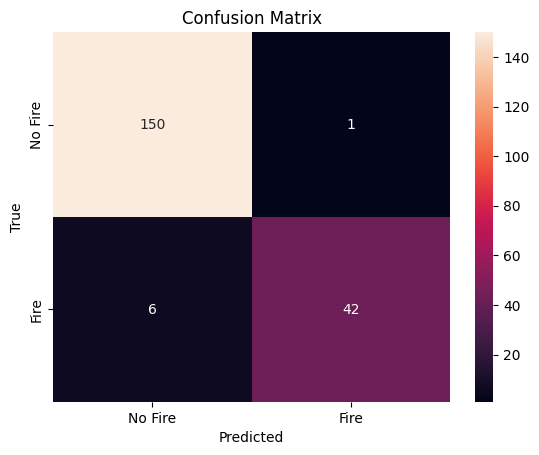

In [9]:
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

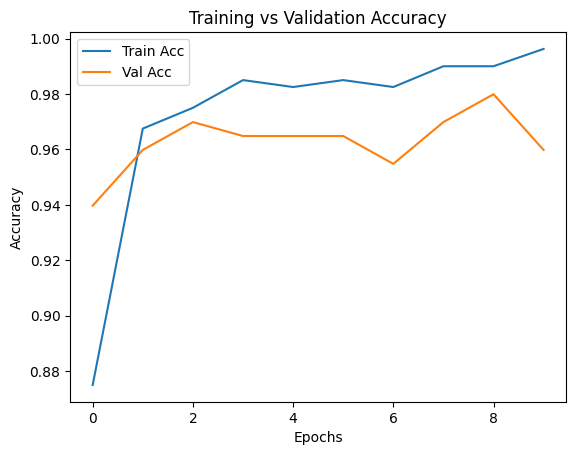

In [10]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

# Define dataset directory
DATASET_DIR = '/content/drive/MyDrive/fire/fire_dataset'

# Set up ImageDataGenerator for validation
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    rotation_range=10,
    shear_range=0.1
)

# Create a flow_from_directory for validation (test on 100 images)
validation_generator = datagen.flow_from_directory(
    DATASET_DIR,  # Your dataset directory
    target_size=IMG_SIZE,  # Resize images to VGG16 input size
    batch_size=100,  # Batch size of 100 images
    class_mode='binary',  # Binary classification (Fire/No Fire)
    subset='validation'  # This will pick 100 images for validation
)

# Print to check the generator
print(f"Total validation images: {validation_generator.samples}")

Found 199 images belonging to 2 classes.
Total validation images: 199


In [12]:
# Evaluate the model on the validation data (100 random images)
loss, accuracy = model.evaluate(validation_generator, verbose=1)

print(f"Validation accuracy on 100 random images: {accuracy * 100:.2f}%")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 61s 28s/step - accuracy: 0.9699 - loss: 0.3289
Validation accuracy on 100 random images: 96.48%


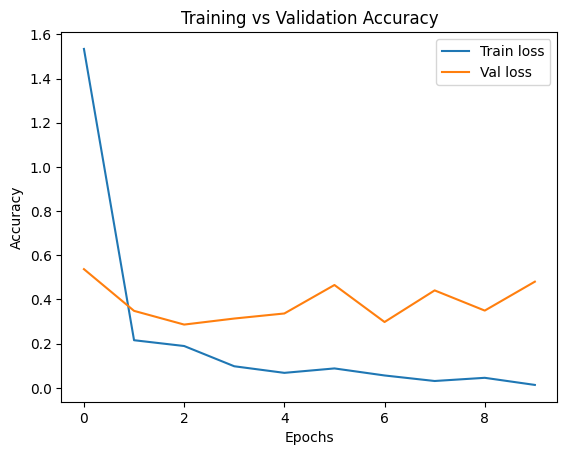

In [13]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

In [14]:
from tensorflow.keras.applications import ResNet50

# Load ResNet50 without the top layer, using pretrained ImageNet weights
base_model1 = ResNet50(include_top=False, input_shape=(224, 224, 3), weights='imagenet')

# Freeze the convolutional base
for layer in base_model1.layers:
    layer.trainable = False


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [16]:
# Add custom top layers
x = base_model1.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Final model
model1 = Model(inputs=base_model1.input, outputs=predictions)

In [17]:
model1.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [18]:
history1 = model1.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.4969 - loss: 1.8831 - val_accuracy: 0.8241 - val_loss: 0.5168
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.8298 - loss: 0.5452 - val_accuracy: 0.9397 - val_loss: 0.2238
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8753 - loss: 0.3696 - val_accuracy: 0.9548 - val_loss: 0.1820
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9328 - loss: 0.1843 - val_accuracy: 0.9749 - val_loss: 0.1849
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9416 - loss: 0.1928 - val_accuracy: 0.9698 - val_loss: 0.1817
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9462 - loss: 0.1409 - val_accuracy: 0.9648 - val_loss: 0.2067
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9487 - loss: 0.2100 - val_accuracy: 0.9799 - val_loss: 0.1537
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9692 - loss: 0.1495 - val_accuracy: 0.9799 - val_loss:

In [22]:
val_generator.reset()
preds1 = model1.predict(val_generator, verbose=1)
y_pred1 = (preds1 > 0.5).astype(int)
y_true1 = val_generator.classes

print("\nClassification Report:")
print(classification_report(y_true1, y_pred1, target_names=["No Fire", "Fire"]))

7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step

Classification Report:
              precision    recall  f1-score   support

     No Fire       0.99      0.99      0.99       151
        Fire       0.98      0.98      0.98        48

    accuracy                           0.99       199
   macro avg       0.99      0.99      0.99       199
weighted avg       0.99      0.99      0.99       199



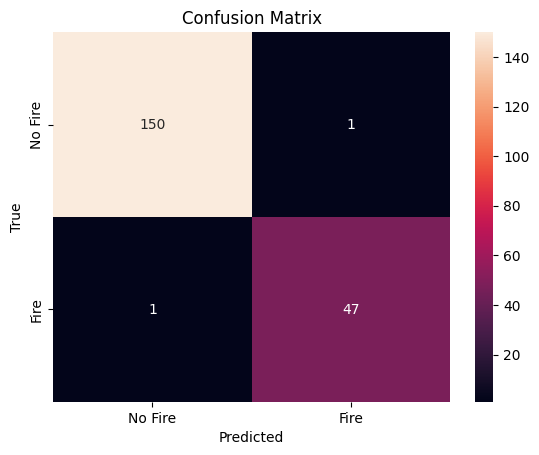

In [40]:
cm1 = confusion_matrix(y_true1, y_pred1)
sns.heatmap(cm1, annot=True, fmt='d', xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

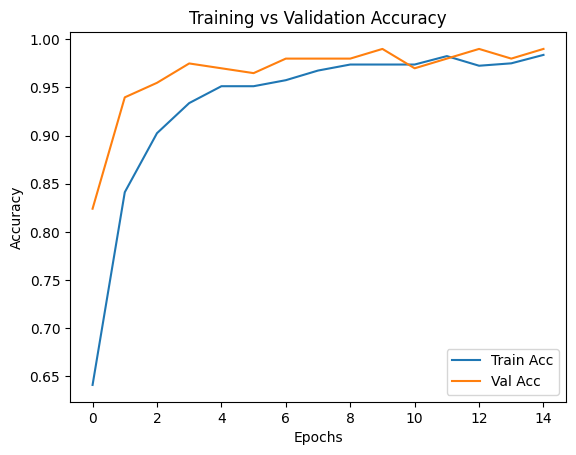

In [24]:
plt.plot(history1.history['accuracy'], label='Train Acc')
plt.plot(history1.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


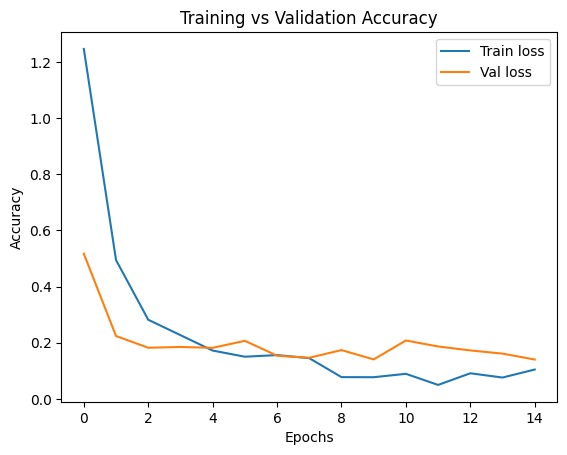

In [25]:
plt.plot(history1.history['loss'], label='Train loss')
plt.plot(history1.history['val_loss'], label='Val loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

# Define dataset directory
DATASET_DIR = '/content/drive/MyDrive/fire/fire_dataset'

# Image size for ResNet50
IMG_SIZE = (224, 224)

# Set up ImageDataGenerator for validation
datagen1 = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    rotation_range=10,
    shear_range=0.1
)

# Create a flow_from_directory for validation (test on 100 images)
validation_generator1 = datagen1.flow_from_directory(
    DATASET_DIR,  # Your dataset directory
    target_size=IMG_SIZE,  # Resize images to ResNet50 input size
    batch_size=100,  # Batch size of 100 images
    class_mode='binary',  # Binary classification (Fire/No Fire)
    subset='validation'  # This will pick 20% of images for validation
)

# Print to check the generator
print(f"Total validation images: {validation_generator1.samples}")


Found 199 images belonging to 2 classes.
Total validation images: 199


In [27]:
# Evaluate the model on the validation data (100 random images)
loss1, accuracy1 = model1.evaluate(validation_generator1, verbose=1)

print(f"Validation accuracy on 100 random images: {accuracy1 * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 23s 10s/step - accuracy: 0.9866 - loss: 0.0962
Validation accuracy on 100 random images: 97.99%


In [28]:
from tensorflow.keras.applications import EfficientNetB0

# Load EfficientNetB0 without the top layer, using pretrained ImageNet weights
base_model2 = EfficientNetB0(include_top=False, input_shape=(224, 224, 3), weights='imagenet')

# Freeze the convolutional base
for layer in base_model2.layers:
    layer.trainable = False


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [29]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Add custom top layers
x = base_model2.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Final model
model2 = Model(inputs=base_model2.input, outputs=predictions)


In [30]:
from tensorflow.keras.optimizers import Adam

model2.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)



In [31]:
history2 = model2.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)


Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.6450 - loss: 0.6926 - val_accuracy: 0.8141 - val_loss: 0.4013
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8067 - loss: 0.4634 - val_accuracy: 0.8543 - val_loss: 0.3457
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.8051 - loss: 0.4478 - val_accuracy: 0.8593 - val_loss: 0.3397
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8414 - loss: 0.3746 - val_accuracy: 0.8794 - val_loss: 0.3670
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8520 - loss: 0.3309 - val_accuracy: 0.8844 - val_loss: 0.3516
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.8689 - loss: 0.3558 - val_accuracy: 0.9095 - val_loss: 0.2754
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8777 - loss: 0.3016 - val_accuracy: 0.8693 - val_loss: 0.3457
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8829 - loss: 0.2451 - val_accuracy: 0.8643 - val_loss:

In [32]:
from sklearn.metrics import classification_report

# Reset the generator
val_generator.reset()

# Predict using model2
preds2 = model2.predict(val_generator, verbose=1)

# Convert probabilities to binary predictions
y_pred2 = (preds2 > 0.5).astype(int)

# True labels
y_true2 = val_generator.classes

# Classification report
print("\nClassification Report:")
print(classification_report(y_true2, y_pred2, target_names=["No Fire", "Fire"]))


7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step

Classification Report:
              precision    recall  f1-score   support

     No Fire       0.92      0.96      0.94       151
        Fire       0.86      0.75      0.80        48

    accuracy                           0.91       199
   macro avg       0.89      0.86      0.87       199
weighted avg       0.91      0.91      0.91       199



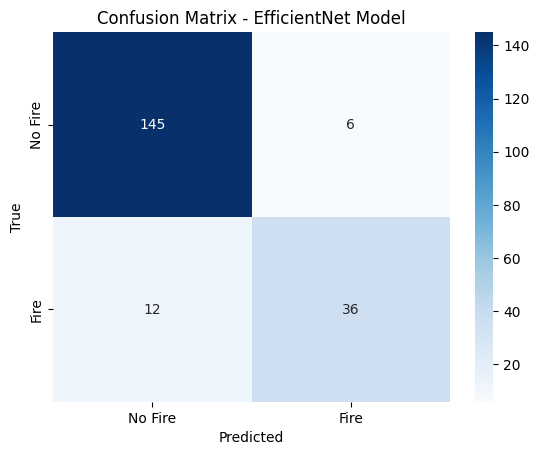

In [33]:
# Compute confusion matrix
cm2 = confusion_matrix(y_true2, y_pred2)

# Plot confusion matrix
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Fire", "Fire"],
            yticklabels=["No Fire", "Fire"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - EfficientNet Model')
plt.show()

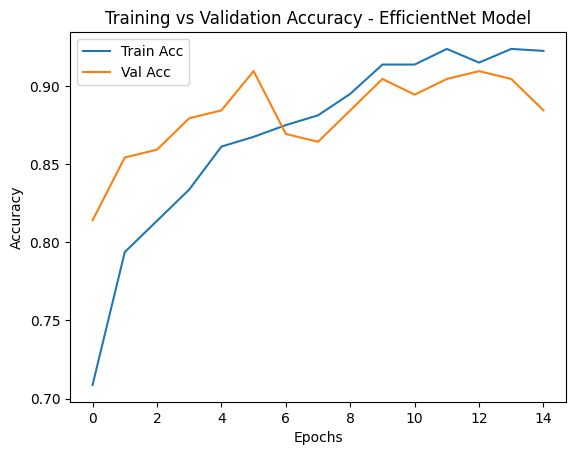

In [34]:
import matplotlib.pyplot as plt

plt.plot(history2.history['accuracy'], label='Train Acc')
plt.plot(history2.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy - EfficientNet Model')
plt.show()


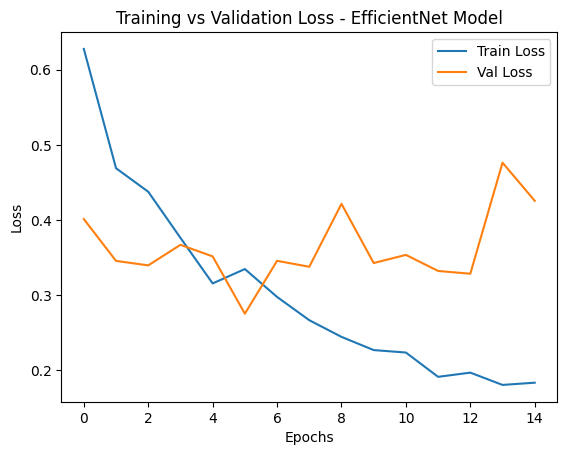

In [35]:
import matplotlib.pyplot as plt

plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss - EfficientNet Model')
plt.show()


In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input

# Define dataset directory
DATASET_DIR = '/content/drive/MyDrive/fire/fire_dataset'

# Image size for EfficientNetB0
IMG_SIZE = (224, 224)

# Set up ImageDataGenerator for validation
datagen2 = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    rotation_range=10,
    shear_range=0.1
)

# Create a flow_from_directory for validation
validation_generator2 = datagen2.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=100,
    class_mode='binary',
    subset='validation'
)

# Print to check the generator
print(f"Total validation images: {validation_generator2.samples}")


Found 199 images belonging to 2 classes.
Total validation images: 199


In [37]:
# Evaluate the model on the validation data (100 random images)
loss2, accuracy2 = model2.evaluate(validation_generator2, verbose=1)

print(f"Validation accuracy on 100 random images: {accuracy2 * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 9s/step - accuracy: 0.8963 - loss: 0.3851
Validation accuracy on 100 random images: 90.45%


**Conclusion**

Here We use three model VGG16,ResNet50,EffecientNet. Out of three model ResNet50 gives us better accuracy(99%) and it's accuracy in unknown data is 97.99%.



